In [1]:
import collections
import os
import re
import matplotlib.pyplot as plt
from colour import Color
import numpy as np
plt.style.use('seaborn-whitegrid')
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.labelsize'] = 25

## Heap's law

In [2]:
word_counts = []
path = '../data/documents/'
for filename in os.listdir(path):
    with open(os.path.join(path, filename), 'r') as f:
        text = f.read()
        text = text.lower()
        text = re.sub(r"[^a-zA-Z^\s]", '', text)
        words = text.split()
        word_counts.append(len(words))

In [3]:
T = []
for i in range(100, len(word_counts), 100):
    x = np.array(word_counts[0:i])
    T.append(x.sum())
x = np.array(word_counts)
T.append(x.sum())

sqrtT = np.sqrt(T)

M = np.loadtxt("../data/nwords.txt")

In [4]:
def mse(A, B):
    return (np.square(A - B)).mean()

def search_k(T, M):
    m = 0
    K = 0
    for k in range(1,101):
        temp = k*sqrtT
        if(k==1):
            m = mse(M, temp)
            K = k
        elif(k>1):
            se = mse(M, temp)
            if(se<m):
                m = se
                K = k
    return K

K = search_k(T, M)

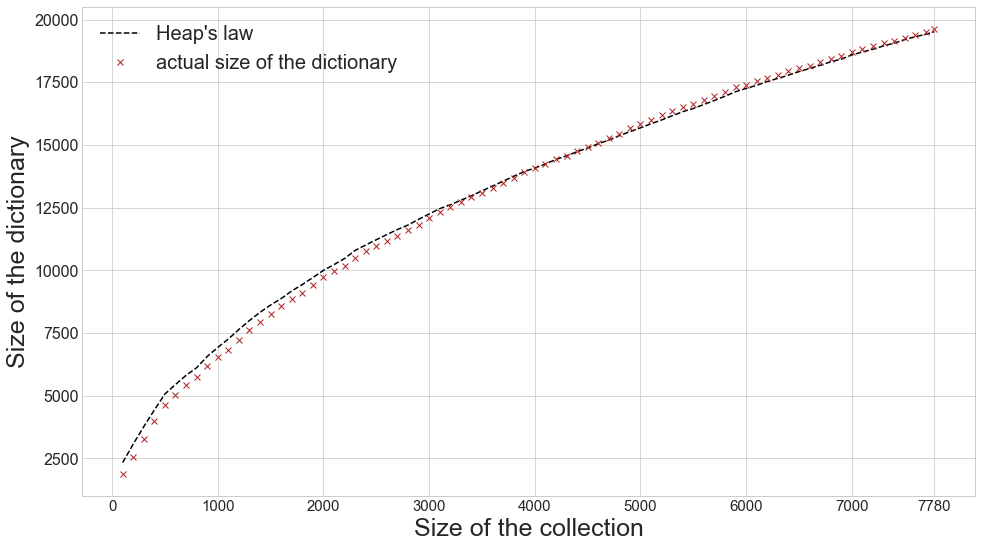

In [5]:
x = [i for i in range(100, len(word_counts), 100)]
x.append(7780)
plt.figure(figsize=(16,9))
plt.plot(x, K*sqrtT, 'k--', label="Heap's law")
plt.plot(x, M, 'x', color='firebrick', label = "actual size of the dictionary")
plt.xlabel("Size of the collection")
plt.xticks([i for i in range(0,7779,1000)] + [7780], fontsize=15)
plt.ylabel("Size of the dictionary")
plt.legend(prop={'size': 20});

## Zipf's law

In [6]:
path = '../data/documents/'
counter = collections.Counter()
for filename in os.listdir(path):
    with open(os.path.join(path, filename), 'r') as f:
        text = f.read()
        text = text.lower()
        text = re.sub(r"[^a-zA-Z^\s]", '', text)
        words = text.split()
        word_frequencies = collections.Counter(words)
        counter += word_frequencies

counter = counter.most_common(200)

In [7]:
#frequency of the most frequent word
top_frequency = counter[0][1]
#list of dictionaries
zipf_table = []
for index, item in enumerate(counter, start=1):
    #theretical zipf's law
    zips_freq = top_frequency*(1/index)
    
    zipf_table.append({'word' : item[0],
                       'frequency' : item[1],
                       'zipf_frequency' : zips_freq })

In [8]:
words = []
frequencies = []
zipf_frequencies = []

for i in range(len(zipf_table)):
    words.append(zipf_table[i]['word'])
    frequencies.append(zipf_table[i]['frequency'])
    zipf_frequencies.append(zipf_table[i]['zipf_frequency'])

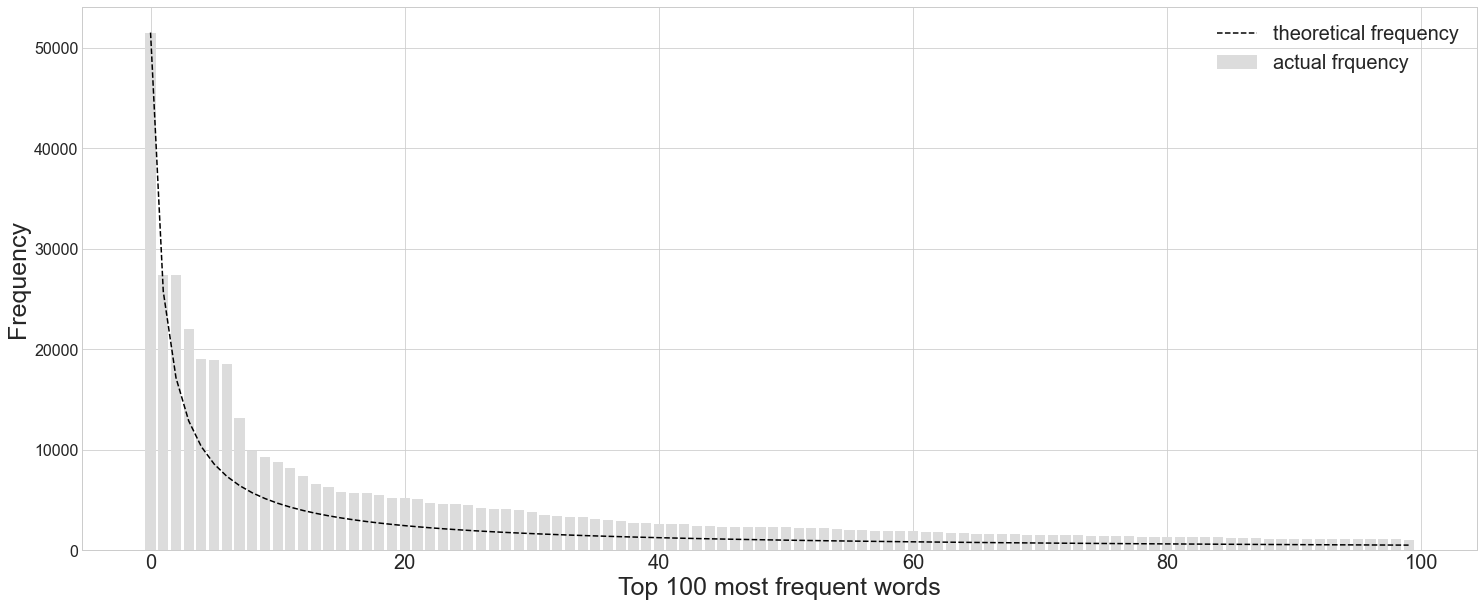

In [9]:
x = np.arange(100)
plt.figure(figsize=(25,10))
plt.bar(x, frequencies[:100], align='center', alpha=1, color='gainsboro', label='actual frquency')
plt.plot(x, zipf_frequencies[:100], 'k--', label = 'theoretical frequency')
plt.ylabel('Frequency')
plt.xlabel('Top 100 most frequent words')
plt.legend(prop={'size': 20});

Text(0.5, 0, 'Frequency')

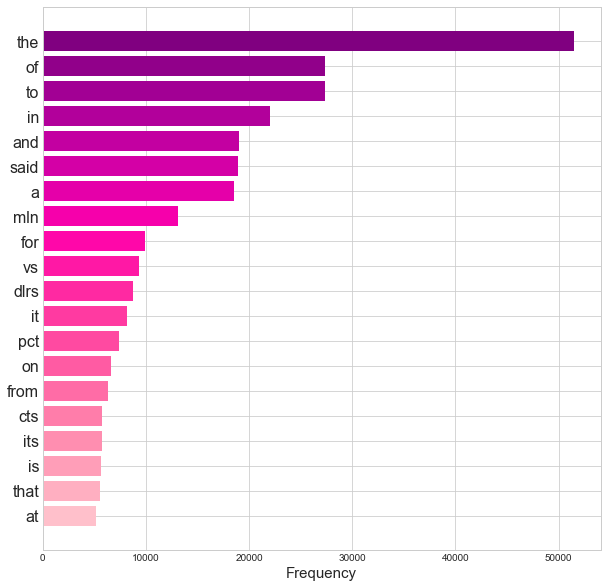

In [10]:
pink = Color("Pink")
colors = list(pink.range_to(Color("Purple"),20))
colors = [color.rgb for color in colors]

y = np.arange(20)
plt.figure(figsize=(10,10))
plt.barh(y, frequencies[:20][::-1], align='center', alpha=1, color=colors, label='actual frquency')
plt.yticks(y, words[:20][::-1], rotation='horizontal')
plt.xticks(fontsize=10)
plt.xlabel('Frequency', fontsize=15);

??? Add percent of total ??

WORD | NUMBER OCCURRENCES | PERCENTAGE OF TOTAL